In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px

In [19]:
from scipy import stats

In [7]:
df=pd.read_csv("student_clustering.csv.xls")

In [14]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [8]:
df.describe().style.background_gradient(cmap="summer")

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [ ]:
df.info()

In [58]:
df.duplicated().sum()
print(f"Numero de duplicados: {df.duplicated().sum()}")
df=df.drop_duplicates(keep="last")

Numero de duplicados: 0


Text(0.5, 0.98, 'Visualizacion de columnas')

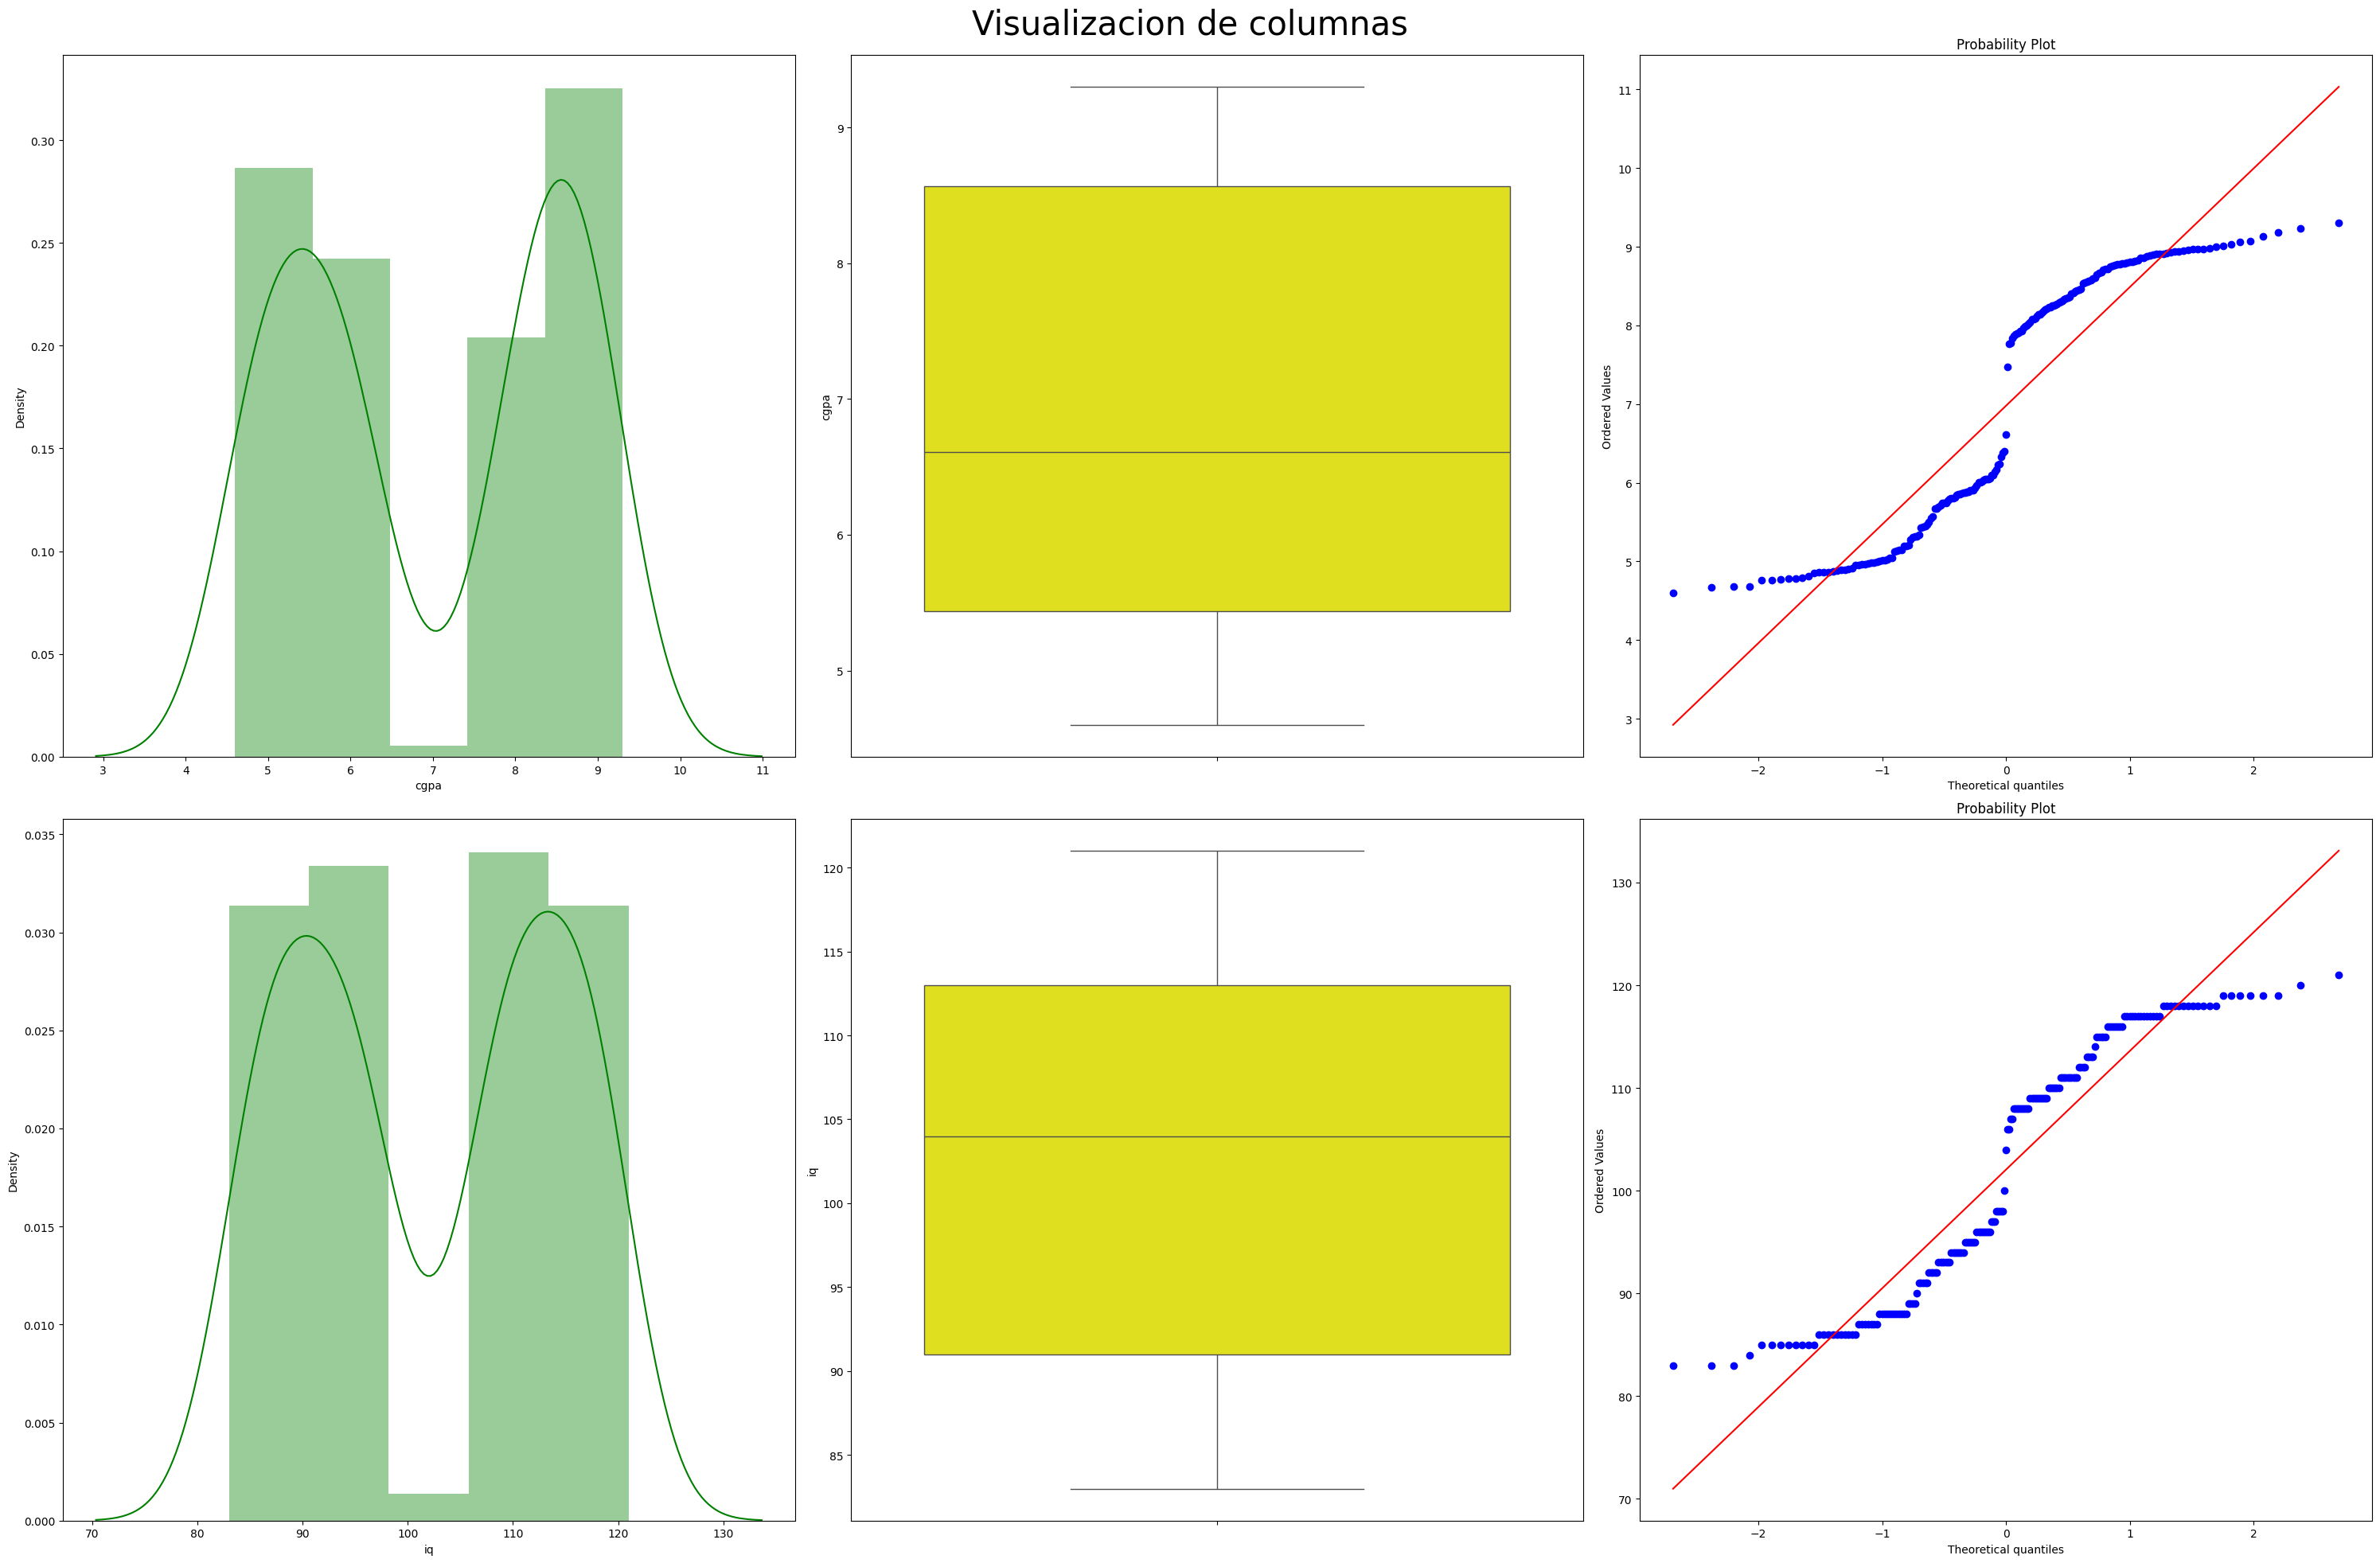

In [21]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(len(df.columns),3, figsize=(30,20))

for index, i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0], color="green")
    sns.boxplot(df[i], ax=ax[index,1], color="yellow")
    stats.probplot(df[i], plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizacion de columnas", fontsize=30)


In [ ]:
fig=px.scatter(df, x="iq", y="cgpa", template="ggplot2")
fig.update_layout(title="Distribucion de indicador estudiantil")

Conclusion de las ultimas graficas:
Hay dos metodos de distribucion. CGPA son 5.5 y 8.5, y el iq de 90 y 115. Eso indica al menos 2 grupos de estudiantes representado en los datos

In [59]:
valores_nulos=df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
cgpa    0
iq      0
dtype: int64


In [62]:
for column in df.select_dtypes(include=[np.number]).columns:
    if df[column].isnull().any():
        mean_value = df[column].mean()
        if pd.notna(mean_value):
            df[column].fillna(mean_value, inplace=True)
        else:
            print(f"Column {column} has all NaN values, cannot fill with mean.")

In [68]:
#outlier detection
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data< (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers = {}
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"Checking column: {column}")
    print(f"Data: {df[column].describe()}")
    outlier_values = detect_outliers_iqr(df[column])
    outliers[column] = outlier_values.dropna()
    print(f"Outliers detected: {outliers[column].tolist()}")

Checking column: cgpa
Data: count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cgpa, dtype: float64
Outliers detected: []
Checking column: iq
Data: count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: iq, dtype: float64
Outliers detected: []


In [72]:
if not outliers[column].empty:
        original_shape = df.shape
        df = df[~df[column].isin(outliers[column].dropna())]
        new_shape = df.shape
        print(f"Removed outliers from {column}: {original_shape[0] - new_shape[0]} rows removed.")
else:
        print(f"No outliers to remove in {column}.")

No outliers to remove in iq.


Missing values by column:
cgpa    0
iq      0
dtype: int64
Numeric columns: Index(['cgpa', 'iq'], dtype='object')


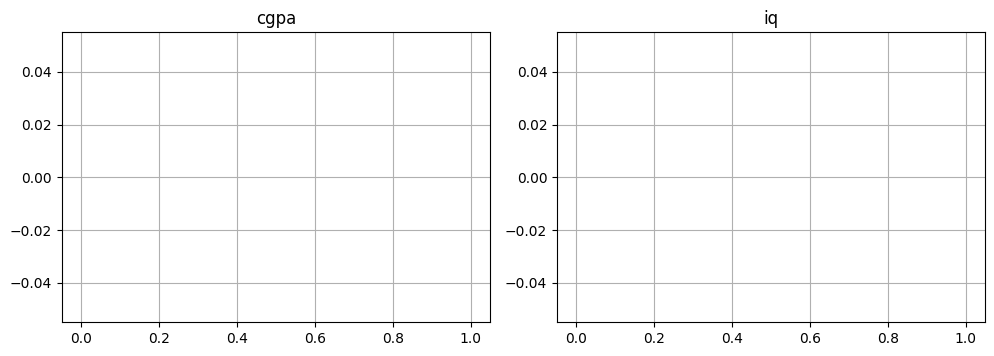

In [78]:

print("Missing values by column:")
print(df.isnull().sum())

df.fillna(0, inplace=True) 
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {numeric_cols}")
if not numeric_cols.empty:
    df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot.")

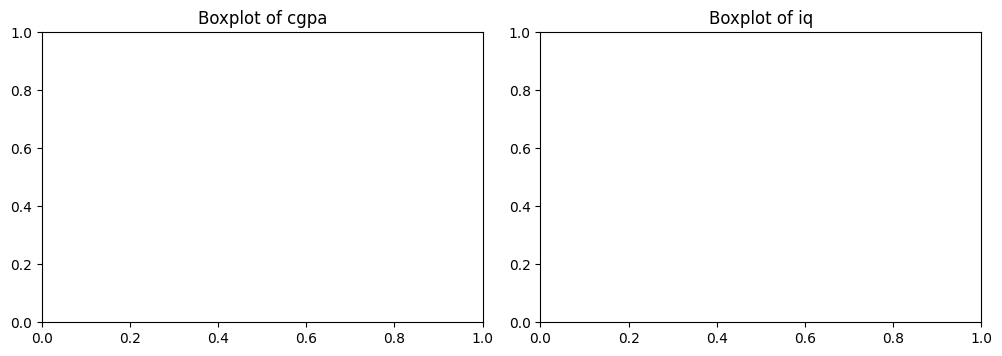

Empty DataFrame
Columns: [cgpa, iq]
Index: []
Unique values in cgpa: []
Unique values in iq: []


In [80]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()
print(df[numeric_cols].head())
for column in numeric_cols:
    print(f"Unique values in {column}: {df[column].unique()}")


Las ultimas graficas no muestra ninguna linea/grafica ya que no se ve ningun valor unico 